In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt 

# 如何从数据中获得信息
例如，波士顿房价数据集，如何找出房价与各个因素的关系？如房价与房间数量大致成线性关系，怎么求出该线性函数？怎么判断求出的函数的好坏？

**1.波士顿房价数据集**

反应房价与地理位置、犯罪率、地段等的相关关系

In [2]:
data = load_boston()
X, y = data['data'], data['target']
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [3]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X.shape, y.shape

((506, 13), (506,))

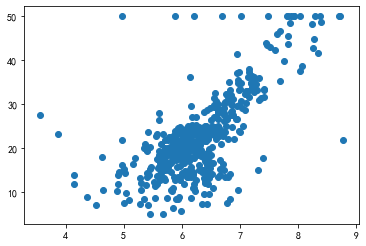

In [5]:
%matplotlib inline
# 房间数与房价的关系示意图

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)


draw_rm_and_price()

**2.从图中看房价与房间数量大致呈线性关系，怎么求出该关系？**
- 随机生成线性函数

/home/yangbin7/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yangbin7/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


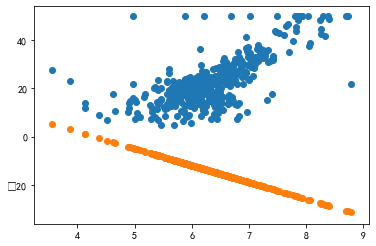

In [6]:
import random


def price(rm, k, b):
    return k * rm + b

def plot():
    X_rm = X[:, 5]
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    draw_rm_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

plot()

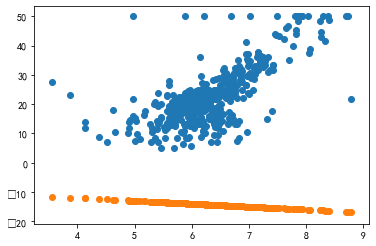

In [7]:
plot()

**3.随机生成函数差别比较大。如何评价生成的不同的函数的优劣？**
- 损失函数

In [8]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2
               for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))


X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
loss(y, price_by_random_k_and_b)

180805.02036521744

**4.从随机生成的函数中选择最优的那个，即损失函数值最小的那个**

In [9]:
X_rm = X[:, 5]

min_loss = float('inf')
best_k, best_b = None, None

for i in range(100000):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    current_loss = loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b, best_k = b, k
        print(
            'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'
            .format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -67 best_b: -15, and the loss is: 213214.05636202174
When time is : 3, get best_k: 16 best_b: 72, and the loss is: 22573.447051446663
When time is : 4, get best_k: 21 best_b: -24, and the loss is: 7414.111675349801
When time is : 11, get best_k: 31 best_b: -95, and the loss is: 6253.733585310277
When time is : 15, get best_k: 9 best_b: 30, and the loss is: 4143.306128867587
When time is : 28, get best_k: 17 best_b: -36, and the loss is: 2407.8007805988113
When time is : 48, get best_k: 7 best_b: -54, and the loss is: 1104.6530982272723
When time is : 76, get best_k: 12 best_b: -66, and the loss is: 219.79886396837955
When time is : 126, get best_k: 18 best_b: -89, and the loss is: 85.1384949169961
When time is : 733, get best_k: 15 best_b: -72, and the loss is: 60.80833512845851
When time is : 806, get best_k: 12 best_b: -55, and the loss is: 52.22060309881422
When time is : 1840, get best_k: 11 best_b: -45, and the loss is: 47.92938870948614
When time is 

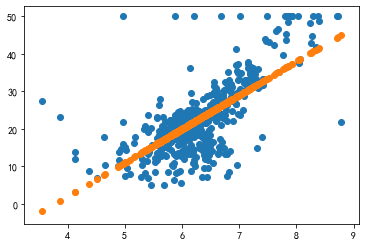

In [10]:
X_rm = X[:, 5]
k = best_k
b = best_b
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

**5.从随机生成中选择的最优拟合效果比较好，但随机选择方法没有方向性，可能做了大量无用功**
- 方向调整：
    - 线性函数两个参数 $k$ 和 $b$， $k$ 可能增大或减小，$b$ 同理
    - 随机最开始的参数后，指定 $k$ 和 $b$ 的变化方向；若后续损失函数减小，则保持该方向变化；否者重新选择变化方向
    - 不再总是是随机的选择参数，而是带一定的方向

In [11]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # k 变大，b 变小
    (+1, +1),
    (-1, -1),
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):

    k_direction, b_direction = next_direction

    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss:  # 性能变好
        min_loss = current_loss
        best_k, best_b = current_k, current_b

        next_direction = next_direction
        print(
            'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'
            .format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 30.71527191692818 best_b: 94.47921798541464, and the loss is: 70488.5059132798
When time is : 2, get best_k: 30.61527191692818 best_b: 94.37921798541464, and the loss is: 70100.8543048504
When time is : 3, get best_k: 30.515271916928178 best_b: 94.27921798541465, and the loss is: 69714.2738682885
When time is : 4, get best_k: 30.415271916928177 best_b: 94.17921798541465, and the loss is: 69328.76460359394
When time is : 5, get best_k: 30.315271916928175 best_b: 94.07921798541466, and the loss is: 68944.326510767
When time is : 6, get best_k: 30.215271916928174 best_b: 93.97921798541466, and the loss is: 68560.95958980753
When time is : 7, get best_k: 30.115271916928172 best_b: 93.87921798541467, and the loss is: 68178.66384071544
When time is : 8, get best_k: 30.01527191692817 best_b: 93.77921798541468, and the loss is: 67797.43926349084
When time is : 9, get best_k: 29.91527191692817 best_b: 93.67921798541468, and the loss is: 67417.28585813374
When time 

**6.换用其它损失函数，效果会不会更优？**

In [12]:
def loss2(y, y_hat):
    return sum(
        abs(y_i - y_hat_i)
        for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [13]:
X_rm = X[:, 5]

min_loss = float('inf')
best_k, best_b = None, None

for i in range(100000):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    current_loss = loss2(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_b, best_k = b, k
        print(
            'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'
            .format(i, best_k, best_b, min_loss))
        

When time is : 0, get best_k: 15 best_b: 43, and the loss is: 114.73670948616603
When time is : 7, get best_k: 9 best_b: -100, and the loss is: 65.9710968379447
When time is : 10, get best_k: 3 best_b: 13, and the loss is: 10.892444664031629
When time is : 126, get best_k: -1 best_b: 24, and the loss is: 7.574258893280632
When time is : 240, get best_k: -2 best_b: 33, and the loss is: 7.270422924901187
When time is : 292, get best_k: 14 best_b: -64, and the loss is: 5.070691699604743
When time is : 1246, get best_k: 9 best_b: -34, and the loss is: 4.451326086956521


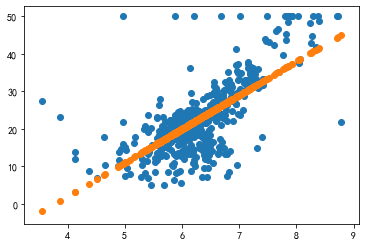

In [14]:
X_rm = X[:, 5]
k = best_k
b = best_b
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

**7.进一步减少求得函数过程中的随机性**
- 每次都向损失更小的方向改变
- 梯度下降

$$loss = \frac{1}{n}\sum{(y_i - \hat{y_i})^2}= \frac{1}{n}\sum{(kx_i+b - \hat{y_i})^2}$$

In [15]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2
               for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))


def partial_k(x, y, y_hat):
    n = len(y)
    return (-2 / n) * sum(
        (y_i - y_hat_i) * x_i
        for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)))


def partial_b(x, y, y_hat):
    n = len(y)
    return (-2 / n) * sum(
        (y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))

In [16]:
trying_times = 2000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-3

update_time = 0

for i in range(trying_times):

    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss:  # performance became better
        min_loss = current_loss
        print(
            'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'
            .format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)

    b_gradient = partial_b(X_rm, y, price_by_k_and_b)

    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -13.559022919089742 best_b: -39.64310118350512, and the loss is: 22020.250743713666
When time is : 1, get best_k: -11.68411575770349 best_b: -39.34832236509748, and the loss is: 18565.686590367302
When time is : 2, get best_k: -9.962866292653523 best_b: -39.07769931636574, and the loss is: 15654.154520887234
When time is : 3, get best_k: -8.382681568586534 best_b: -38.82925236088599, and the loss is: 13200.293884518653
When time is : 4, get best_k: -6.932000680792832 best_b: -38.601164065827675, and the loss is: 11132.162097162041
When time is : 5, get best_k: -5.600210193906639 best_b: -38.39176594534449, and the loss is: 9389.125419955895
When time is : 6, get best_k: -4.377566492433125 best_b: -38.19952625368353, and the loss is: 7920.081291957482
When time is : 7, get best_k: -3.2551244950071045 best_b: -38.02303877870541, and the loss is: 6681.960099055183
When time is : 8, get best_k: -2.2246722108462733 best_b: -37.86101255382692, and the loss is: 5

When time is : 1974, get best_k: 9.308399050200283 best_b: -35.9828562496996, and the loss is: 43.621767647394414
When time is : 1975, get best_k: 9.308394089496298 best_b: -35.98282469407614, and the loss is: 43.621766627040714
When time is : 1976, get best_k: 9.308389128911605 best_b: -35.98279313921151, and the loss is: 43.62176560673609
When time is : 1977, get best_k: 9.3083841684462 best_b: -35.982761585105685, and the loss is: 43.621764586480566
When time is : 1978, get best_k: 9.30837920810008 best_b: -35.98273003175865, and the loss is: 43.621763566274076
When time is : 1979, get best_k: 9.308374247873243 best_b: -35.98269847917038, and the loss is: 43.6217625461167
When time is : 1980, get best_k: 9.308369287765686 best_b: -35.982666927340865, and the loss is: 43.62176152600836
When time is : 1981, get best_k: 9.308364327777404 best_b: -35.98263537627008, and the loss is: 43.62176050594902
When time is : 1982, get best_k: 9.308359367908398 best_b: -35.982603825958016, and the

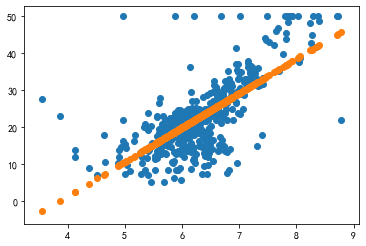

In [17]:
X_rm = X[:, 5]
k = current_k
b = current_b
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

**更换损失函数**
$loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} = \frac{1}{n}\sum{|kx_i+b- \hat{y_i}|}$

In [18]:
def loss(x, y, y_hat):
    return sum(abs(y_hat_i - y_i) for y_hat_i, y_i in zip(y_hat, y)) / len(y)


def partial_b(x, y, y_hat):
    return sum([
        1 if y_hat_i - y_i >= 0 else -1
        for y_i, y_hat_i in zip(list(y), list(y_hat))
    ]) / len(x)


def partial_k(x, y, y_hat):
    return sum([
        x_i if y_hat_i - y_i >= 0 else -1 * x_i
        for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))
    ]) / len(x)

In [21]:
k = 1
b = -5

loops = 3000
learning_rate = 1e-3
min_loss = float('inf')

for i in range(loops):
    y_hat = [k * x_i + b for x_i in X_rm]
    current_loss = loss(X_rm, y, y_hat)

    if min_loss > current_loss:
        min_loss = current_loss
        print(
            'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'
            .format(i, k, b, min_loss))
    k = k - partial_k(X_rm, y, y_hat) * learning_rate
    b = b - partial_b(X_rm, y, y_hat) * learning_rate

When time is : 0, get best_k: 1 best_b: -5, and the loss is: 21.248171936758926
When time is : 1, get best_k: 1.0062846343873517 best_b: -4.999, and the loss is: 21.2076753073762
When time is : 2, get best_k: 1.0125692687747034 best_b: -4.997999999999999, and the loss is: 21.16717867799357
When time is : 3, get best_k: 1.0188539031620552 best_b: -4.996999999999999, and the loss is: 21.12668204861083
When time is : 4, get best_k: 1.0251385375494069 best_b: -4.995999999999999, and the loss is: 21.086185419228148
When time is : 5, get best_k: 1.0314231719367586 best_b: -4.994999999999998, and the loss is: 21.045688789845492
When time is : 6, get best_k: 1.0377078063241103 best_b: -4.993999999999998, and the loss is: 21.005192160462794
When time is : 7, get best_k: 1.043992440711462 best_b: -4.992999999999998, and the loss is: 20.96469553108008
When time is : 8, get best_k: 1.0502770750988137 best_b: -4.991999999999997, and the loss is: 20.924198901697405
When time is : 9, get best_k: 1.05

When time is : 1935, get best_k: 4.247567839920655 best_b: -4.5417826086953506, and the loss is: 5.2220527027897035
When time is : 1936, get best_k: 4.247577241106425 best_b: -4.54182213438705, and the loss is: 5.222051052127105
When time is : 1937, get best_k: 4.2475866422921955 best_b: -4.541861660078749, and the loss is: 5.22204940146451
When time is : 1938, get best_k: 4.247596043477966 best_b: -4.541901185770448, and the loss is: 5.222047758396217
When time is : 1939, get best_k: 4.247578978260575 best_b: -4.541944664031318, and the loss is: 5.222046192726856
When time is : 1940, get best_k: 4.247588379446345 best_b: -4.541984189723017, and the loss is: 5.222044542064249
When time is : 1941, get best_k: 4.247597780632115 best_b: -4.542023715414716, and the loss is: 5.222042891401654
When time is : 1942, get best_k: 4.2476071818178855 best_b: -4.5420632411064155, and the loss is: 5.222041240739059
When time is : 1943, get best_k: 4.247616583003656 best_b: -4.542102766798115, and th

When time is : 2935, get best_k: 4.25398714031585 best_b: -4.581450592884689, and the loss is: 5.220437799143788
When time is : 2936, get best_k: 4.253993936758538 best_b: -4.581490118576388, and the loss is: 5.220436190671851
When time is : 2937, get best_k: 4.2540007332012255 best_b: -4.5815296442680875, and the loss is: 5.2204345821999185
When time is : 2938, get best_k: 4.254007529643913 best_b: -4.581569169959787, and the loss is: 5.220432973727987
When time is : 2939, get best_k: 4.254014326086601 best_b: -4.581608695651486, and the loss is: 5.220431365256038
When time is : 2940, get best_k: 4.254021122529289 best_b: -4.581648221343185, and the loss is: 5.220429756784107
When time is : 2941, get best_k: 4.2540279189719765 best_b: -4.581687747034884, and the loss is: 5.220428148312168
When time is : 2942, get best_k: 4.254034715414664 best_b: -4.581727272726583, and the loss is: 5.220426539840227
When time is : 2943, get best_k: 4.254041511857352 best_b: -4.581766798418283, and th

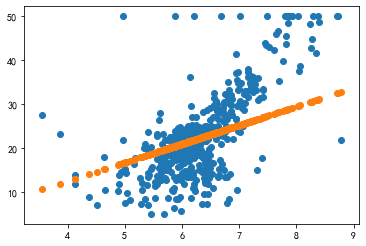

In [22]:
X_rm = X[:, 5]
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

**8.上述整个过程还涉及到如下问题：**
- 初始化问题：如何选择最初的 k 和 b 值
    - 与训练速度，及最终性能有关
- 模型定义问题：price 线性函数
    - 针对特定问题特定的模型：线性、多项式、神经网络等
    - 更复杂的函数可能导致过拟合
- 代价函数：loss 函数
    - 损失函数的选择，哪种损失函数更好
- 求解方法：梯度下降等
    - 快速的更新求解
- 优化问题：学习速率
    - 学习速率如何随着学习过程进行调整
- 监督学习：学习目标是使损失值最小，及预测目标与实际目标更接近